#  **Análisis y Predicción de Datos Meteorológicos con Métodos de Interpolación**

### **Integrantes**:  
##### Alejandro Chávez - 32.278.392
##### Cesar Dominguez - 30.640.838
##### José Santana - 31.608.829

---
  
En el presente proyecto estaremos analizando con distintos métodos de Interpolación, las temperaturas de una ciudad, con el fin de modelar e intentar predecir estos datos meteorológicos.

Los metodos de interpolación que emplearemos son:
* Interpolación de Taylor
* Interpolación de Lagrange
* Interpolación de Hermite
* Interpolación Polinómica a Trozos
---  
## **Generación de datos**

Para la generación de datos utilizaremos como referencia la ciudad de Valencia, Carabobo (Ubicada en Venezuela), ciudad la cual mantiene una temperatura dentro de un rango comprendido por el valor de la temperatura mínima (20°c) y el valor de la temperatura máxima (30°c) de la última semana en la ciudad. Por lo tanto utilizaremos una función que pueda comprender entre dichos valores. La función a utilizar será:

**y(x)=5⋅sin(x)+25**

In [4]:
lista = []
for x in 1:7
    push!(lista,5 * sin(x) + 25)
end
println(lista)

Any[29.207354924039482, 29.54648713412841, 25.705600040299338, 21.21598752346036, 20.205378626684308, 23.60292250900537, 28.284932993593944]


A continuación se graficará los valores de temperaturas obtenidos en 7 días

In [2]:
#Instalar paquetes necesarios (Solo hacer 1 vez, puede tardar más o menos 1 minutos)
using Pkg
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `C:\Users\Alejandro\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Alejandro\.julia\environments\v1.10\Manifest.toml`


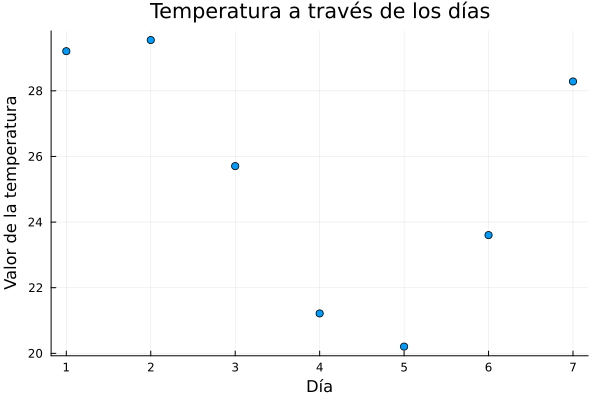

In [27]:
ejex = 1:length(lista)
ejey = lista
scatter(ejex, ejey, xlabel="Día", ylabel="Valor de la temperatura", title="Temperatura a través de los días", legend=false, marker=:circle)

---

## **Interpolación de Taylor**

La interpolación de Taylor es una técnica matemática que usa la serie de Taylor para aproximar una función mediante un polinomio, basado en la función y sus derivadas en un punto específico.

![Polinomio de Taylor](../../resources/polinomio-taylor.png)

Para la interpolación de Taylor se nos pide escoger un punto especifico para estos datos. Por lo que escogeremos el valor de de f(x=1), es decir escogeremos el valor de la función para el primer día. Para el valor de N escogeremos el valor más alto admitido (20).

In [6]:
#Tendremos acceso a la libreria Sympy
using Pkg
Pkg.add("SymPy")
using SymPy

   Resolving package versions...
  No Changes to `C:\Users\Alejandro\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Alejandro\.julia\environments\v1.10\Manifest.toml`


In [43]:
x0 = 1 #Elección del valor del día / Punto especificado = x0
x= symbols("x")
f= 5*sin(x)+25
taylor = f.subs(x,x0)
for k in 1:20
    derivada = diff(f,x)
    taylor = taylor + derivada.subs(x,x0) * ((x-x0)^k)/factorial(k)
    f = derivada
end

print(expand(taylor))



x^20*sin(1)/486580401635328000 - x^19*sin(1)/24329020081766400 - x^19*cos(1)/24329020081766400 - x^18*sin(1)/2560949482291200 + x^18*cos(1)/1280474741145600 + x^17*cos(1)/142274971238400 + x^17*sin(1)/85364982743040 - x^16*cos(1)/5021469573120 + x^16*sin(1)/7725337804800 - 101*x^15*sin(1)/31384184832000 - x^15*cos(1)/482833612800 - 389*x^14*sin(1)/12553673932800 + 101*x^14*cos(1)/2092278988800 + 389*x^13*cos(1)/896690995200 + 4241*x^13*sin(1)/6276836966400 - 4241*x^12*cos(1)/482833612800 + 4357*x^12*sin(1)/772533780480 - 305353*x^11*sin(1)/2897001676800 - 4357*x^11*cos(1)/64377815040 - 1960649*x^10*sin(1)/2633637888000 + 305353*x^10*cos(1)/263363788800 + 1960649*x^9*cos(1)/263363788800 + 33588829*x^9*sin(1)/2897001676800 - 33588829*x^8*cos(1)/321889075200 + 258805669*x^8*sin(1)/3862668902400 - 209594293*x^7*sin(1)/251073478656 - 258805669*x^7*cos(1)/482833612800 - 47102631757*x^6*sin(1)/12553673932800 + 209594293*x^6*cos(1)/35867639808 + 47102631757*x^5*cos(1)/2092278988800 + 110037003

A continuación, se mostrará la grafica de los datos originales y la interpolación de Taylor.

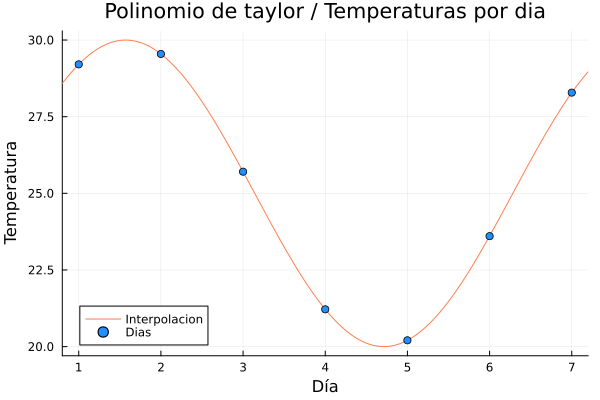

In [47]:
plot(taylor,title="Polinomio de taylor / Temperaturas por dia",xlims=(0.8,7.2),label="Interpolacion",xlabel="Día",ylabel="Temperatura",color=:coral)
scatter!(ejex, ejey,marker=:circle,color=:dodgerblue,label="Dias")

---

## **Interpolacion de Lagrange**

La interpolación de Lagrange es una de las interpolaciones más útiles en integración numérica, ésta consiste en una representación de polinomios  de la función.

![Polinomio de Langrange](https://misapuntesyacimientos.wordpress.com/wp-content/uploads/2016/05/clip_image003_thumb.png?w=600)

El polinomio de interpolación de Lagrange, simplemente es una reformulación del polinomio de Newton que evita los cálculos de las diferencias divididas.

Ahora con los datos anteriores que utilizamos en la interpolacion de Taylor , vamos a realizar la interpolacion de lagrange
para todos los puntos...

In [ ]:
#Accedemos a libreria SymPy
using Pkg
Pkg.add("SymPy")
using SymPy

In [ ]:
#Datos anteriores
xi = [1,2,3,4,5,6,7]
yi = [29.207354924039482, 29.54648713412841, 25.705600040299338, 21.21598752346036, 20.205378626684308, 23.60292250900537, 28.284932993593944]

In [ ]:
function lagran(x,y)
    n = length(x)
    variable = symbols("x")
    lagra = 0
    for i in 1:n
        nume = 1
        deno = 1
        for j in 1:n
            if j != i 
                nume *= (variable - x[j])
                deno *= (x[i] - x[j])
            end
        end
        lagra += y[i]*nume/deno
    end
    return lagra
end


A continuación se graficará los valores de temperaturas obtenidos en 7 días

In [422]:
x = 1:length(lista)
y = lista
scatter(x, y, xlabel="Día", ylabel="Valor de la temperatura", title="Temperatura a través de los días", legend=false, marker=:circle)

In [424]:
x_inter = 1:8
result = lagran(xi,yi)
y_inter = [result(i) for i in x_inter]
plot(xi,yi,seriestype=:scatter, label="Temperaturas")
plot!(x_inter,y_inter,title="Polinomio de Lagrange",legend=false)

---

## **Interpolacion de Hermite**

Es un método de interpolación de puntos de datos como una función polinómica. El polinomio de Hermite permite relacionar puntos conociendo sus primera derivadas y sus funciones, y trabaja utilizando el metodo de Lagrange.

El polinomio interpolador de hermite viene dado por:  
<img src="../../resources/hermite_def.png" width="50%"><img src="../../resources/hermite_res.png" width="50%">

Una vez conocido la definicion y la construccion del polinomio interpolador de hermite, ahora realizaremos el polinomio en forma de codigo, utilizando el lenguaje de programacion **Julia**.

Primeramente necesitaremos la libreria Plots, la cual fue previamente importada: 

In [30]:
using Plots

Y declararemos los datos:

In [5]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [29.207354924039482, 29.54648713412841, 25.705600040299338, 21.21598752346036, 20.205378626684308, 23.60292250900537, 28.284932993593944]
dy_dx = [4.48, 4.37, 3.98, 3.27, 3.10, 3.67]

6-element Vector{Float64}:
 4.48
 4.37
 3.98
 3.27
 3.1
 3.67

**x** : Siendo los dias de la semana  
**y** : Siendo sus temperaturas evaluadas en la funcion:  
**y(x)=5⋅sin(x)+25**  
**dy_dx** = Siendo la derivada de la funcion siendo evaluada en las temperaturas

Crearemos una funcion que retorne el metodo de hermite:

In [8]:
function interpolacion_hermite(x, y, dy_dx, x_interp) #x_interp : Valor para interpolar
    n = length(x)
    resultado = 0
    for i in 1:n
        li = 1
        for j in 1:n
            if i != j
                #Se utiliza el metodo de Lagrange por cada valor utilizando productoria
                li *= (x_interp - x[j]) / (x[i] - x[j])
            end
        end
        hi = (1 - 2 * (x_interp - x[i]) * sum(1 / (x[i] - x[j]) for j in 1:n if i != j)) * li^2
        hj = (x_interp - x[i]) * li^2
        #Se hace la sumatoria total
        resultado += y[i] * hi + dy_dx[i] * hj
    end
    return resultado
end

interpolacion_hermite (generic function with 1 method)

Y desplegamos dicha funcion utilizando la herramienta grafica Plots:

In [9]:
x_interp = range(1, 7, length=100)
#Interpolamos cada valor
y_interp = [interpolacion_hermite(x, y, dy_dx, xi) for xi in x_interp]

# Creando Grafico
plot(x, y, seriestype=:scatter, label="Temperaturas")
plot!(x_interp, y_interp, label="Interpolacion de Hermite")
xlabel!("x")
ylabel!("y")
title!("Metodo de Interpolacion de Hermite")

LoadError: BoundsError: attempt to access 6-element Vector{Float64} at index [7]

## **Interpolación Polinómica a Trozos**

La interpolacion Polinomica a trozos su  idea es subdividir el intervalo [a, b] en
subintervalos, e interpolar en cada subintervalo por un polinomio de grado fijo, de
modo que la funcion interpolante sea globalmente continua. Esto aumentara la precision de la interpolacion,
como las interpolaciones a trozos tiene varios casos, como lagrange,hermite, spline,etc...

Nosotros elegimos **la interpolacion de lagrange a trozos** en la cual vamos a ver a continuación

In [ ]:
#Datos:
x = [1, 2, 3, 4, 5, 6, 7]
y = [29.207354924039482, 29.54648713412841, 25.705600040299338, 21.21598752346036, 20.205378626684308, 23.60292250900537, 28.284932993593944]

**x** : Siendo los dias de la semana  
**y** : Siendo sus temperaturas evaluadas en la funcion:  
**y(x)=5⋅sin(x)+25**  

Importamos las librerias necesarias: 

In [293]:
using Plots

Ahora se realiza la interpolacion de lagrange previamente planteada pero agregando un parametro para cada valor del intervalo

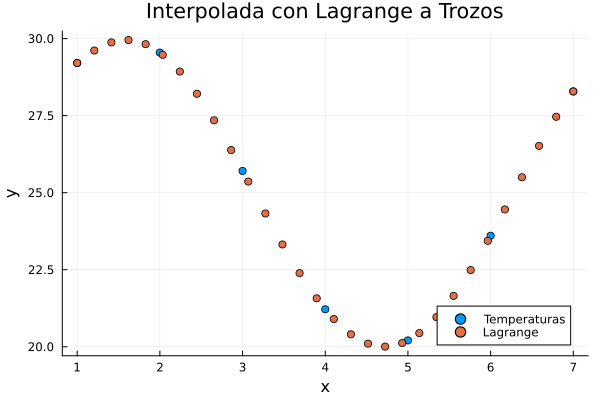

In [4]:
using Plots

x = [1, 2, 3, 4, 5, 6, 7]
y = [29.207354924039482, 29.54648713412841, 25.705600040299338, 21.21598752346036, 20.205378626684308, 23.60292250900537, 28.284932993593944]

#x_interp valor a interpolar
function inter_lagran(x, y, x_interp)
    n = length(x)
    lagra = 0
    for i in 1:n
        nume = 1
        deno = 1
        for j in 1:n
            if j != i
                nume *= (x_interp - x[j])
                deno *= (x[i] - x[j])
            end
        end
        lagra += y[i] * nume / deno
    end
    return lagra
end

#Length la cantidad de punto o intervalos que tendra
x_plot = range(1, stop=7, length=30)
y_plot = [inter_lagran(x, y, xi) for xi in x_plot]

plot(x, y, seriestype=:scatter, label="Temperaturas")
plot!(x_plot, y_plot,seriestype=:scatter, label="Lagrange", xlabel="x", ylabel="y", title="Interpolada con Lagrange a Trozos")